In [2]:
from shapely.geometry import Point,LineString, Polygon

#座標系の緯度経度情報を作成
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

point_type= type(point1)

point_type

shapely.geometry.point.Point

In [4]:
#座標系を取得

point_coords= point1.coords

type(point_coords)


In [7]:
#GEt x and y coordinates
#a tuple where x and y coordinates stored inside numpy arrays
# 
point_coords.xy


(array('d', [2.2]), array('d', [4.2]))

In [9]:
point_dist= point1.distance(point2)

print("Distance between the points of {0:.2f} decimal degrees".format(point_dist))

Distance between the points of 29.72 decimal degrees


In [23]:
""" Line Stirng """

' Line Stirng '

In [25]:
line= LineString([point1, point2, point3])

print("line variable: \n", line)

line variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [28]:
lxy=line.xy

In [29]:
line_x= lxy[0]

line_y= lxy[1]

print("line_x:\n", line_x, '\n')

print("line_y:\n", line_y, '\n')

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456]) 



In [31]:
l_length=line.length

#get the centroid of the line
l_centroid= line.centroid

print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line", l_centroid)

Length of our line: 52.46
Centroid of our line POINT (6.229961354035622 -11.89241115757239)


In [32]:
"""Polygon"""

'Polygon'

In [36]:
#Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

poly2= Polygon([p.x, p.y] for p in [point1, point2, point3])

poly_type=poly.geom_type
#different format
print(poly_type)
print(type(poly))



Polygon
<class 'shapely.geometry.polygon.Polygon'>


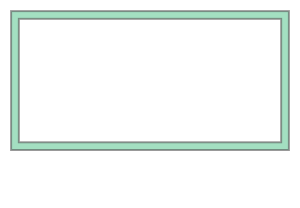

In [38]:

# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

world_has_a_hole

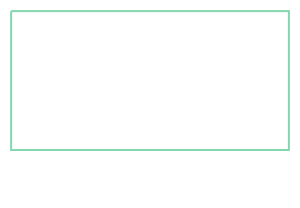

In [46]:
"""Polygon attributes and functions"""

world_centroid= world.centroid

#面積的な？
world_area= world.area

#Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

world_ext= world.exterior

world_ext_length= world_ext.length
#world_ext_length


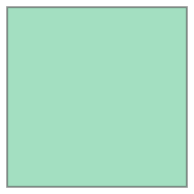

In [53]:
"""Geometry collections"""

from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])


# Its alse possible to pass coordinates tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
#connect west and east
multi_poly = MultiPolygon([west_poly, east_poly_box])



In [59]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

convex= multi_point.convex_hull
west_area = multi_poly[0].area

valid= multi_poly.is_valid

False